### Verify the effective conductivity setting for Equation 5

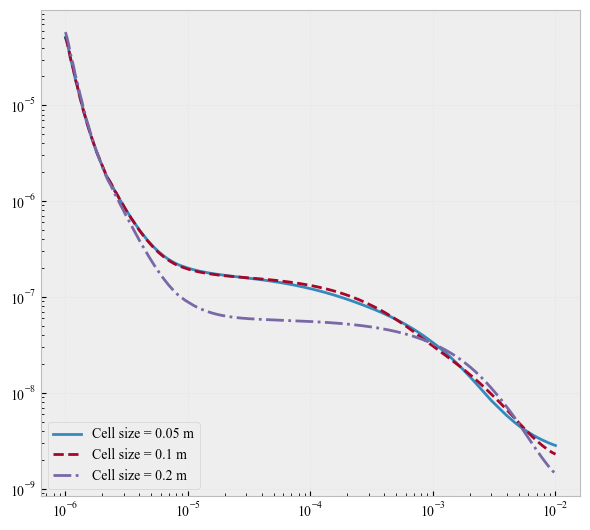

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.style.use('bmh')

offset = [0, 5, 10, 20, 30, 50]
dir = [1, 2, 3, 4, 5]   # 异常体的方位
cell = [0.0125, 0.025, 0.05, 0.1]

tunnel_length = [6]

dir = ['x', 'y', 'z']
times = np.logspace(np.log10(1e-6), np.log10(1e-2), 300)
line = ['-', '--', '-.', ':']

dobs1 = []
for i in range(len(cell)):
    path = "./data_multiSteel/data_offset{}_cell{}_tunnel{}m_singleSteel.npy".format(offset[0], cell[i], tunnel_length[0])
    dobs1.append(np.load(path).reshape(3, times.shape[0]))

fig = plt.figure(figsize=(6, 6))
plt.rcParams["font.family"] = ["Times New Roman"]
ax = plt.gca()
font = 10

k = 1
for i in range(1, len(cell)):
    ax.loglog(times, np.abs(dobs1[i][0]), 'C{}{}'.format(i-1, line[i-1]), label='Cell size = {}'.format(cell[i]*2) + ' m', lw = 2)

ax.legend(loc=3)
ax.grid(True, c="0.9")
plt.tight_layout(rect=[0, 0.1, 1, 1])  # 调整布局以给图例留出空间

# plt.savefig("./data_fig10/figure10-3.png", dpi=350, bbox_inches="tight")
# plt.savefig('./Figure_all/figure9.png', dpi=350, bbox_inches="tight")

### 测试离散金属结构的单元数量对模拟的影响

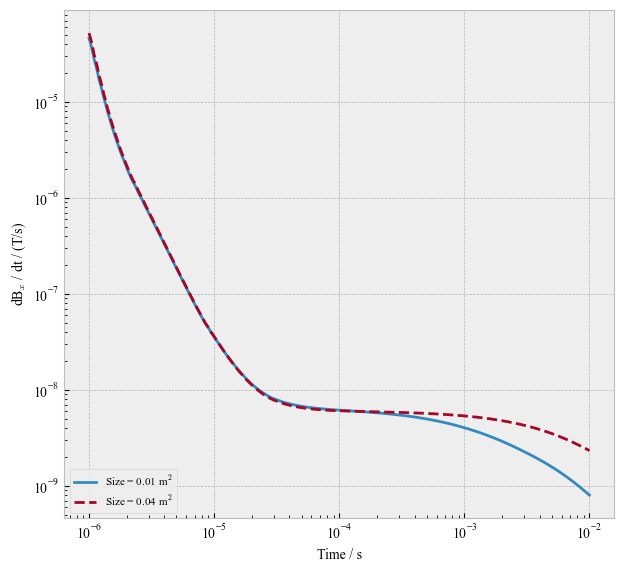

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

cell = [0.025, 0.05, 0.1]
thickness = [0.1, 0.2]
dobs2 = []
for i in range(len(thickness)):
    path = "./data_multiSteel/data_offset{}_cell{}_tunnel{}m_thickness{}m_singleSteel.npy".format(offset[0], cell[i], thickness[i], tunnel_length[0])
    dobs2.append(np.load(path).reshape(3, times.size))


fig = plt.figure(figsize=(12,6), dpi=100)
ax = plt.subplot(121)
plt.rcParams["font.family"] = ["Times New Roman"]
label = ["Size = "]

font = 10
for i in range(len(thickness)):
    ax.loglog(times, np.abs(dobs2[i][0]), 'C{}{}'.format(i, line[i]), label=label[0]+'{}'.format(round(thickness[i]**2, 4)) + ' m$^2$', lw = 2)

    # ax.text(0.88, 0.97, f"({chr(97+i)})", transform=ax.transAxes, fontsize=font, verticalalignment='top')
    ax.set_xlabel('Time / s', fontsize=font)
    ax.set_ylabel('dB$_{}$ / dt / (T/s)'.format(dir[0]), fontsize=font)
    ax.legend(loc=3, fontsize=8)
    # ax.grid(True, c="0.9")
    ax.tick_params(axis='both', which='major', labelsize=font)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # 调整布局以给图例留出空间
# plt.savefig('./data_fig6/Figure6.png', dpi=350, bbox_inches="tight")
# plt.savefig('./Figure_all/figure6.png', dpi=350, bbox_inches="tight")

### Plot figure 2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


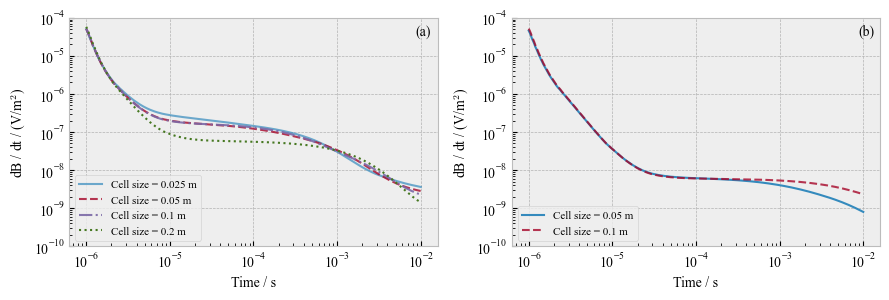

In [19]:
cell = [0.0125, 0.025, 0.05, 0.1]
line = ['-', '--', '-.', ':']

fig = plt.figure(figsize=(9, 3.2), dpi=100)
plt.rcParams["font.family"] = "Times New Roman"
font = 10

ax1 = plt.subplot(1, 2, 1)
for i in range(len(cell)):
    al =0.7 + i * 0.1
    ax1.loglog(times, np.abs(dobs1[i][0]), 'C{}{}'.format(i, line[i]), label='Cell size = {}'.format(cell[i]*2) + ' m', lw = 1.5,  alpha=al)

ax1.text(0.94, 0.97, f"({chr(97+0)})", transform=ax1.transAxes, fontsize=font, verticalalignment='top')
# ax1.grid(True, c="0.9")
ax1.legend(loc=3, fontsize=8)
ax1.set_xlabel('Time / s', fontsize=font)
ax1.set_ylabel('dB / dt / (V/m$^2$)', fontsize=font)
ax1.set_ylim(1e-10, 1e-4)

ax2 = plt.subplot(1, 2, 2)
for i in range(len(thickness)):
    al = 1 - i * 0.2
    ax2.loglog(times, np.abs(dobs2[i][0]), 'C{}{}'.format(i, line[i]), label="Cell size = {} m".format(cell[i+1]*2), lw = 1.5, alpha=al)
ax2.text(0.94, 0.97, f"({chr(97+1)})", transform=ax2.transAxes, fontsize=font, verticalalignment='top')
# ax2.grid(True, c="0.9")
ax2.legend(loc=3, fontsize=8)
ax2.set_xlabel('Time / s', fontsize=font)
ax2.set_ylabel('dB / dt / (V/m$^2$)', fontsize=font)
ax2.set_ylim(1e-10, 1e-4)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # 调整布局以给图例留出空间
plt.savefig('./figure2.eps', dpi=350, bbox_inches="tight")
plt.savefig('./figure2.png', dpi=350, bbox_inches="tight")
plt.savefig('./figure2.tiff', dpi=350, bbox_inches="tight")